Curstomer Churn Prediction

In [4]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [5]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
print(data.shape)
print(f"\nNo of rows: {data.shape[0]}")
print(f"No of columns: {data.shape[1]}")

(7043, 21)

No of rows: 7043
No of columns: 21


In [7]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
data.drop(["customerID"],axis=1,inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
for col in data.columns:
  print(col,data[col].unique())
  print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
-------

In [11]:
data.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [12]:
# data["TotalCharges"] = data["TotalCharges"].astype(float)

In [13]:
len(data[data['TotalCharges']==" "])

11

In [14]:
# there are only 11 missing values -
# so it is not necesary to convert " " to NAN and handle them

# data['TotalCharges'] = data['TotalCharges'].replace(" ",np.nan)
data['TotalCharges'] = data['TotalCharges'].replace(" ","0.0")

In [15]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [16]:
# checking the class distribution of target column
data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


**Insights**


1.   Custome ID removed
2.   No missing values in the dataset
3.   Found TotalCharges should be float but seen it as Object dtype
4.   Missing values in TotalCharges are replaced with 0
5.   Class imbalances are identified in target ( they effect tree based models )



## EDA

In [17]:
data.shape

(7043, 20)

In [18]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [20]:
data.describe()
# This only works on numerical data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Understanding the distribution of numerical features


In [21]:
def histogram(data,col):

  plt.figure(figsize=(5,3))
  sns.histplot(data[col],kde=True)
  plt.title(f"Distribution of {col}")

  # Calculate the mean and median of columns
  col_mean = data[col].mean()
  col_median = data[col].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean,color='red',linestyle='dashed',linewidth=1)
  plt.axvline(col_median,color='green',linestyle='dashed',linewidth=1)

  plt.legend(['Mean','Median'])

  plt.show()


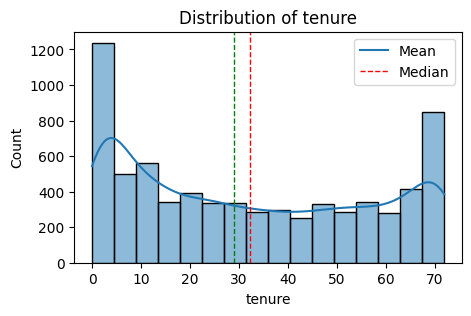

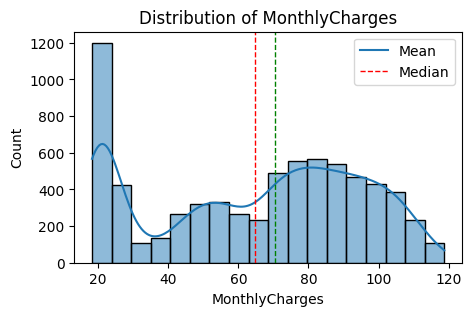

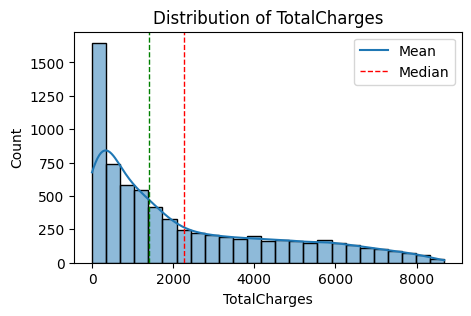

In [22]:
numeric_col = ['tenure','MonthlyCharges','TotalCharges']

for col in numeric_col:
  histogram(data,col)

In [23]:
# A small Insight -> if Mean > Median  * High outliers Exist

Box-Plot for numerical features

In [24]:
def box_plt(data,col):

  plt.figure(figsize=(5,3))
  sns.boxplot(data[col])
  plt.title(f"BOX - PLOT of {col}")
  plt.show()

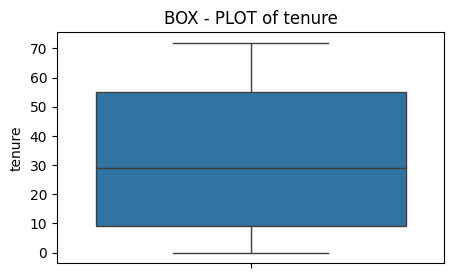

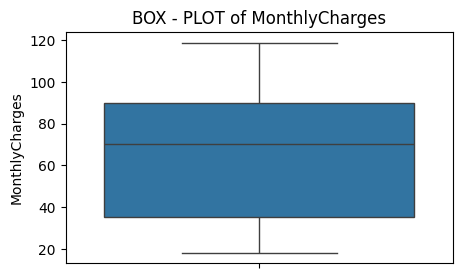

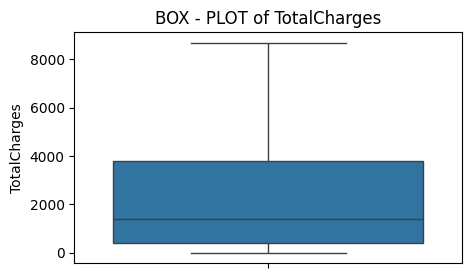

In [25]:
for col in numeric_col:
  box_plt(data,col)

In [26]:
# There are no outliers seen ( cause there are no dots above the lines )

Coorelation Heatmap for numerical columns

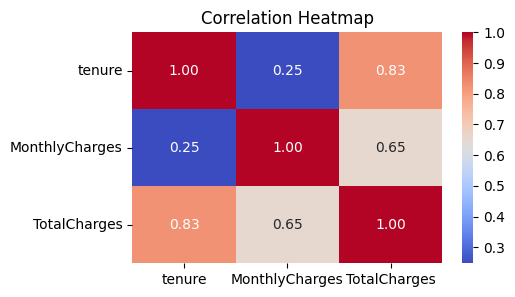

In [27]:
plt.figure(figsize=(5,3))
sns.heatmap(data[["tenure","MonthlyCharges","TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [28]:
# Tenure and TotalCharges are highly correlated -
# We need to delete either one of them

Categorical Features - Analysis

In [29]:
object_col = data.select_dtypes(include='object').columns.to_list()

object_col = ["SeniorCitizen"] + object_col


object_col

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

count plot for categorical columns

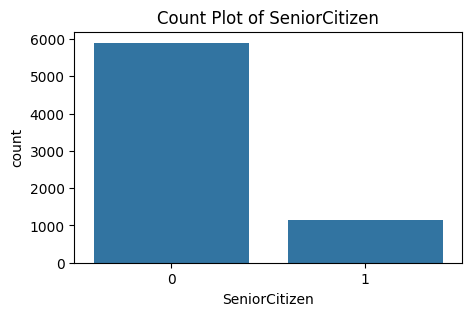

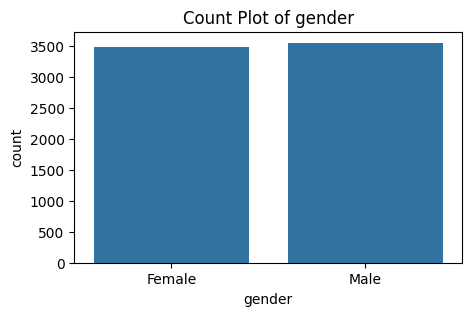

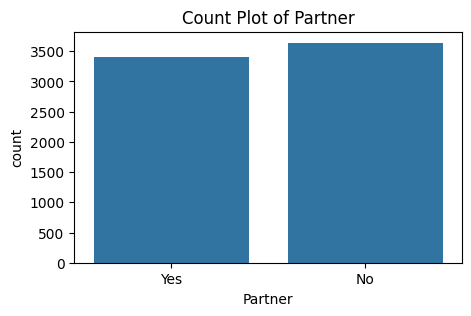

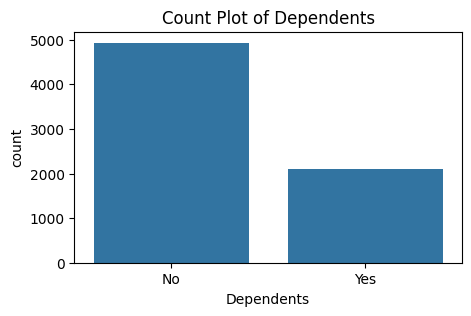

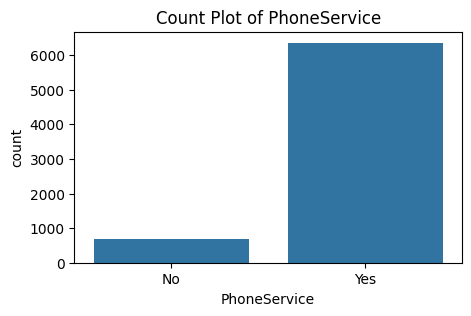

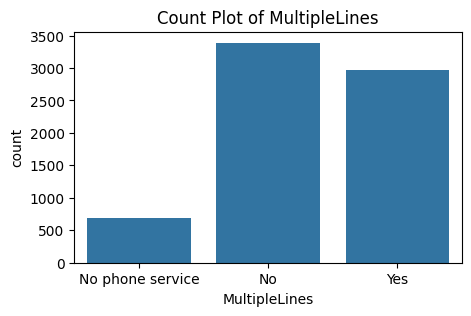

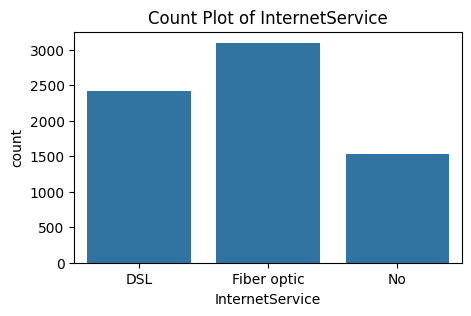

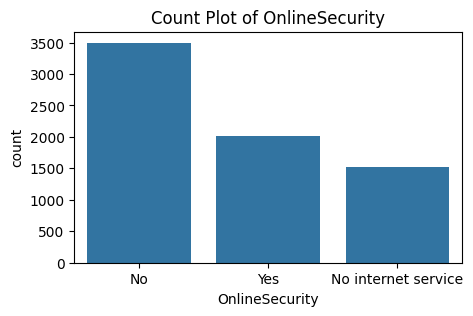

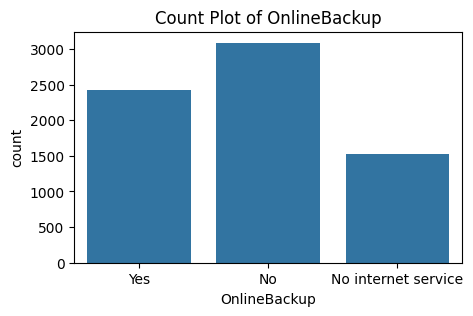

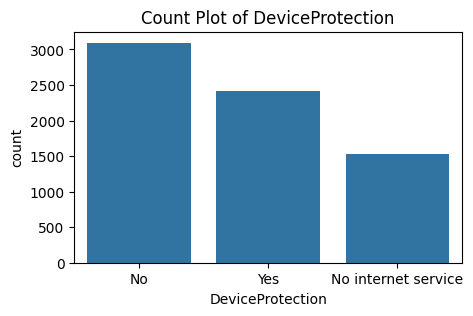

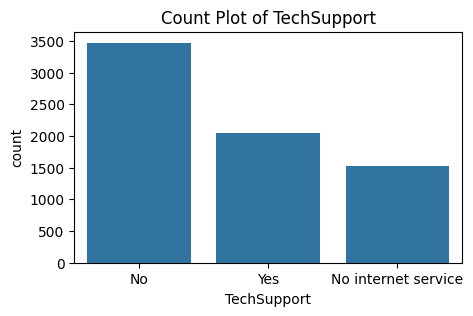

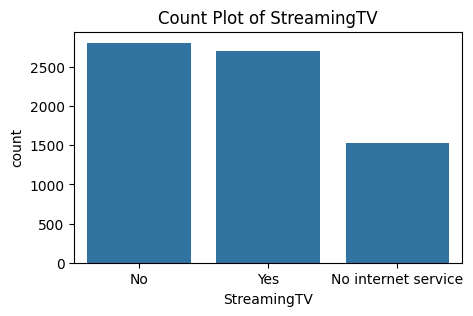

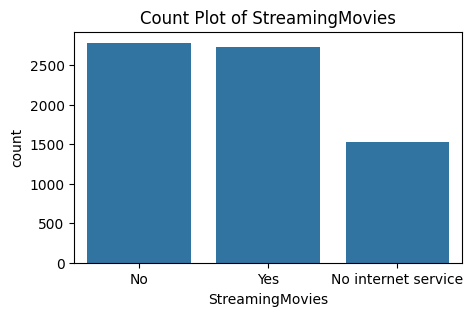

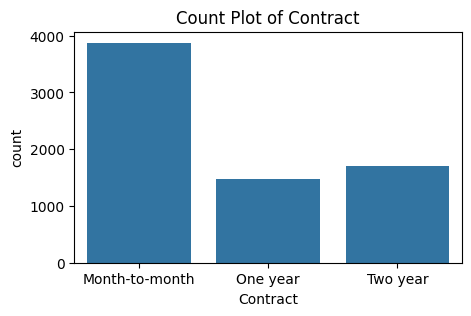

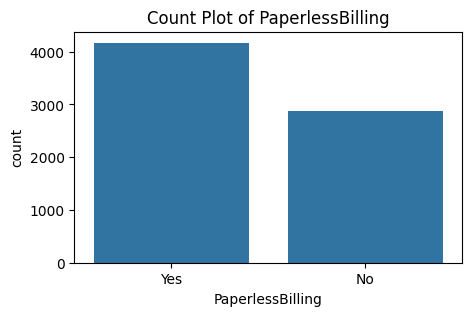

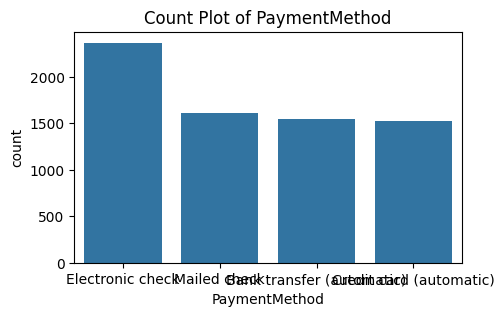

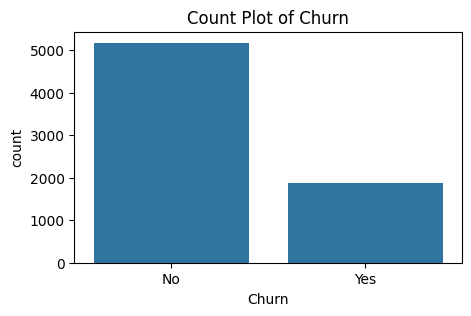

In [30]:
for col in object_col:
  plt.figure(figsize=(5,3))
  sns.countplot(data=data,x=col)
  plt.title(f"Count Plot of {col}")
  plt.show()

## Data Preprocessing

In [31]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


label encoding of target column

In [32]:
data['Churn'] = LabelEncoder().fit_transform(data['Churn'])

In [33]:
print(data['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [34]:
# Identifying columns with object data Type

object_columns = data.select_dtypes(include='object').columns.to_list()
object_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [35]:
# initialize dictionary to save all encoders
encoders = {}

# Apply label encoding and store the encoders
for column in object_columns:
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[column])
    encoders[column] = encoder

# Save the encoders to a pickle file
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [36]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [37]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Train-Test-Split

In [38]:
X = data.drop("Churn",axis=1)
Y = data["Churn"]

In [39]:
X.shape,Y.shape

((7043, 19), (7043,))

In [40]:
# Spliting train and test datasets
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


In [41]:
x_train.shape,y_train.shape

((5634, 19), (5634,))

In [42]:
x_test.shape,y_test.shape

((1409, 19), (1409,))

In [43]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


Synthetic Minority Oversampling TEchnique (SMOTE)

In [44]:
# to handle imbalnces in target (y_train)
smote = SMOTE(random_state=42)

x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

In [45]:
x_train_smote.shape,y_train_smote.shape

((8276, 19), (8276,))

In [46]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [47]:
# Balanceed the imbalances in target

## Model Training

**Training with default hyperparameters**

In [48]:
# Dictionary of models

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}


In [49]:
# dictionary to store the cross validation results
cv_scores = {}

# perform 5 folds cross validation for each model
for model_name,model in models.items():
  print(f"\nTraining {model_name} Model with default parameters")
  scores = cross_val_score(model,x_train_smote,y_train_smote,cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"Cross Validation (CV) accuracy: {scores.mean()}\n")



Training Decision Tree Model with default parameters
Cross Validation (CV) accuracy: 0.7778026621130524


Training Random Forest Model with default parameters
Cross Validation (CV) accuracy: 0.8407582789672636


Training XGBoost Model with default parameters
Cross Validation (CV) accuracy: 0.8309727512880014



In [50]:
cv_scores

{'Decision Tree': array([0.68297101, 0.71299094, 0.82175227, 0.83564955, 0.83564955]),
 'Random Forest': array([0.72524155, 0.77824773, 0.90513595, 0.89425982, 0.90090634]),
 'XGBoost': array([0.70048309, 0.75649547, 0.90271903, 0.89486405, 0.90030211])}

/tmp/ipython-input-808802534.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=mean_cv_accuracies, palette='viridis')


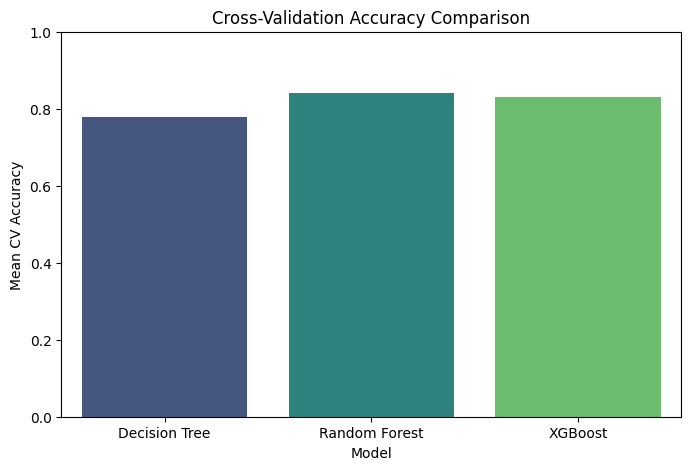

In [51]:
model_names = list(cv_scores.keys())
mean_cv_accuracies = [scores.mean() for scores in cv_scores.values()]

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=mean_cv_accuracies, palette='viridis')
plt.title('Cross-Validation Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Mean CV Accuracy')
plt.ylim(0, 1) # Accuracy ranges from 0 to 1
plt.show()

Random forest gives highest accuracy compared to other models with default parameters

In [52]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

In [53]:
y_test.value_counts()

,count
Churn,
0,1036
1,373


In [54]:
# Evaluation of model
y_pred = rfc.predict(x_test)


print(f"\nConfusion Matrix :\n{confusion_matrix(y_test,y_pred)}")
print(f"\nClassification Report :\n{classification_report(y_test,y_pred)}")


Accuracy Score : 0.7785663591199432

Confusion Matrix :
[[878 158]
 [154 219]]

Classification Report :
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409




Accuracy Score : 0.7785663591199432




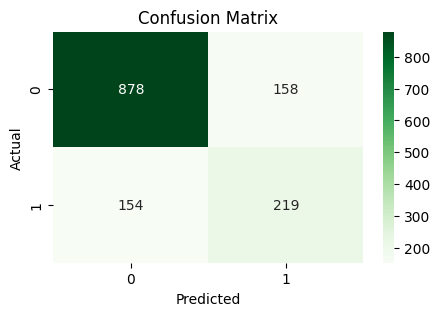



Classification Report :
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [72]:
print(f"\nAccuracy Score : {accuracy_score(y_test,y_pred)}\n\n")

plt.figure(figsize=(5, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"\n\nClassification Report :\n{classification_report(y_test,y_pred)}")

There is a class imbalance in test data so accuracy score is not reliable

We can always rely on cross-validation score

In [55]:
X.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [56]:
# Saving the trrained model as pickle file
model_data = {"model": rfc,"feature_names": X.columns.tolist()}

with open('rfc_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

model_data : model name , x->contains all the feautures obtained just after deleting target ,

**Using Grid Search CV** ( Do later )

In [57]:
# There is a class imbalance in the test soo we shoud'nt see - accuracy
# we should see precission , recall , f1-score

# Load the saved model and build Predictive System

In [58]:
# Load saved model and encoders and feature names

with open("rfc_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["feature_names"]


In [59]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [60]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [61]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

input_data_df1 = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
  encoders = pickle.load(f)

print("Before encoding\n")
print(input_data_df1.head())

# Encode categorical features using the same saved encoders
for column,encoder in encoders.items():
  if column in input_data_df1.columns:
    input_data_df1[column] = encoder.transform(input_data_df1[column])

Before encoding

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes  Electronic check           29.85         29.85  


In [62]:
print("\nAfter encoding\n")
print(input_data_df1.head())


After encoding

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2           29.85         29.85  


In [63]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [64]:
# Make Prediction

prediction = loaded_model.predict(input_data_df1)
pred_prob = loaded_model.predict_proba(input_data_df1)

print(prediction)

print(f"prediction : {"churn" if prediction[0]==1 else "No Churn"}")
print(f"Probability of Churn : {pred_prob}")


[0]
prediction : No Churn
Probability of Churn : [[0.78 0.22]]


# To-Do

*   Hyper Parametr Tuning (Grid search cv) - to avoid overfitting
*   Try different oversampling or down sampling techniques

*   Revise everything and post -



